In [1]:
#importing packages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


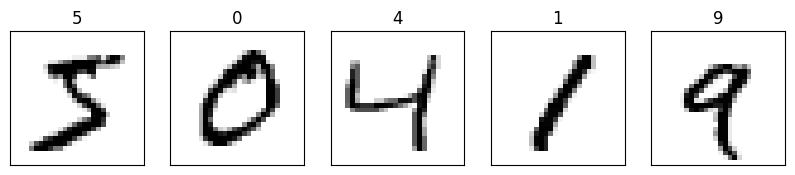

In [4]:
# Dataset properties
## display some images
fig,axes = plt.subplots(ncols=5, sharex = False,sharey=True, figsize=(10,4))

for i in range(5):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i], cmap='gray_r')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()


In [5]:
## preprocessing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
## reshaping
x_train = x_train.reshape(x_train.shape[0],28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28,28, 1)
input_shape = (28,28,1)


In [7]:
## applying normalisation
x_train = x_train/255.0
x_testg = x_test/255.0
num_classes = 10

In [8]:
## creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [11]:
## Model : sequential

model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),
                 activation=tf.nn.relu,
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation =tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = tf.nn.softmax))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_4 (Bat  (None, 26, 26, 128)       512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 26, 26, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_5 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 64)       

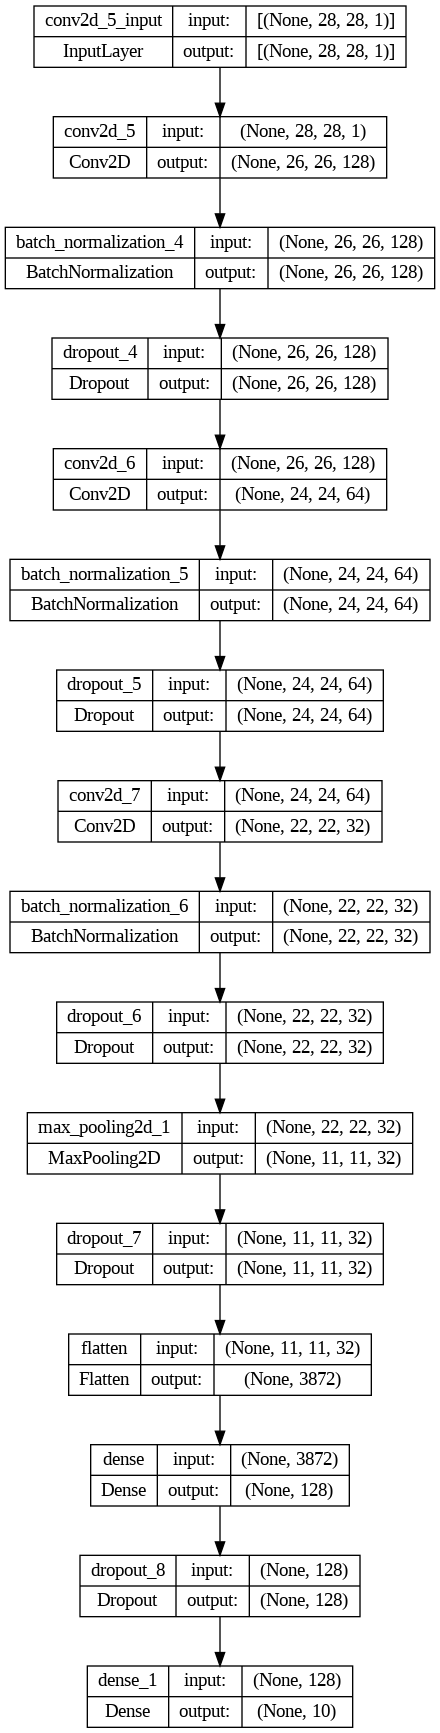

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file = 'model.png')

In [14]:
## Train the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=x_train,
                    y=y_train,
                    validation_split=0.1,
                    epochs=10)

Epoch 1/10
1688/1688 [==============================] - 656s 388ms/step - loss: 0.2581 - accuracy: 0.9236 - val_loss: 0.0985 - val_accuracy: 0.9760
Epoch 2/10
1688/1688 [==============================] - 642s 380ms/step - loss: 0.1060 - accuracy: 0.9692 - val_loss: 0.0626 - val_accuracy: 0.9843
Epoch 3/10
1688/1688 [==============================] - 643s 381ms/step - loss: 0.0826 - accuracy: 0.9752 - val_loss: 0.0834 - val_accuracy: 0.9853
Epoch 4/10
1688/1688 [==============================] - 634s 376ms/step - loss: 0.0733 - accuracy: 0.9784 - val_loss: 0.0944 - val_accuracy: 0.9858
Epoch 5/10
1688/1688 [==============================] - 644s 382ms/step - loss: 0.0628 - accuracy: 0.9822 - val_loss: 0.1080 - val_accuracy: 0.9838
Epoch 6/10
1688/1688 [==============================] - 640s 379ms/step - loss: 0.0601 - accuracy: 0.9825 - val_loss: 0.0972 - val_accuracy: 0.9848
Epoch 7/10
1688/1688 [==============================] - 648s 384ms/step - loss: 0.0499 - accuracy: 0.9854 - val_

In [15]:
model.save('handwriting.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from tensorflow.keras.models import load_model
model = load_model('handwriting.h5')

In [17]:
## Evaluating the model
loss_and_acc = model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 27s 84ms/step - loss: 3.5070 - accuracy: 0.9852
Test Loss 3.507021427154541
Test Accuracy 0.9851999878883362


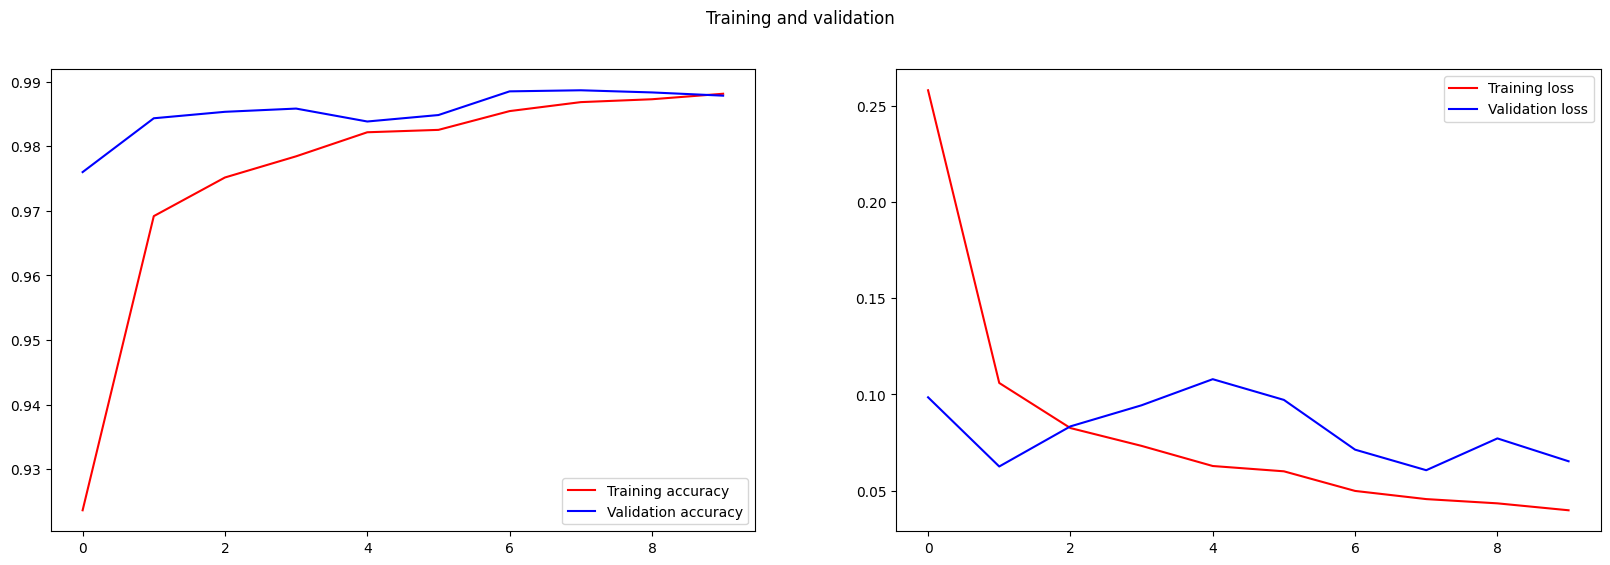

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

313/313 [==============================] - 27s 84ms/step
Predicted Value:  7
Successful prediction


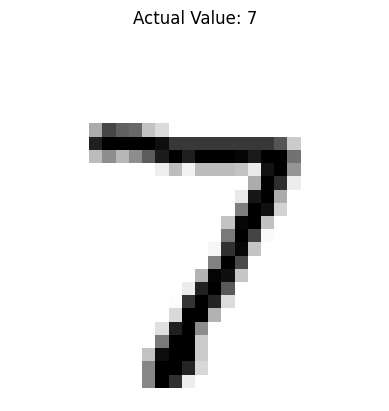

In [19]:
# Testing the Model
plt.imshow(x_test[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[0]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(y_test[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 27s 85ms/step
Predicted Value:  2
Successful prediction


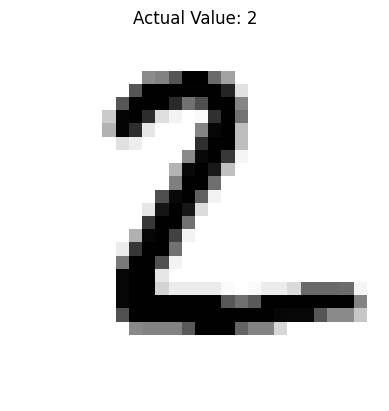

In [20]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')